In [1]:
import curriculaLDA
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/osama.nasir@ebryx.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
#%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
#df_tmp = curriculaLDA.loadCurricula()

In [4]:
#df_tmp.to_excel("all_curricula.xlsx", engine='xlsxwriter')
#len(df_tmp)

# Preprocessing Data

In [5]:
df = pd.read_excel('all_curricula.xlsx')
#df = df_tmp

In [6]:
df.head()

,Unnamed: 0,filename,text
0,0,LGST-242-642.pdf,"\n\n \n\n \n\nLGST 242/642 \nBig Data, Big Re..."
1,1,CodeAndPower2017.pdf,LIS 500 \nCODE and POWER\n\nSchool of Library ...
2,2,Time-Machine-syllabus.pdf,UNIV 200-10 Time/Machine - Syllabus\n\nWelcome...
3,3,CMS_332D_Digital_Ethics_Syllabus_Undergr.pdf,CMS 332D Digital Ethics \nUniversity of Texas ...
4,4,i453-syllabus.pdf,School Of Informatics & Computing\n\nInformati...


In [7]:
len(df)

166

In [8]:
corpus, id2word, data_lemmatized = curriculaLDA.preprocessData(df)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/en_core_web_sm
-->
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [9]:
print(len(corpus))
print(len(id2word))
print(len(data_lemmatized))
#print(data_lemmatized)

166
1515
166


# Teaching Modalities model

In [11]:
#defining bloom levels
bloom = list()
#create
#bloom.append(['abstract', 'animate', 'arrange', 'assemble', 'budget', 'categorize', 'code', 'combine', 'compile', 'compose', 'construct', 'cope', 'correspond', 'create', 'cultivate', 'debug', 'depict', 'design', 'develop', 'devise', 'dictate', 'enhance', 'explain', 'facilitate', 'format', 'formulate', 'generalize', 'generate', 'handle', 'import', 'improve', 'incorporate', 'integrate', 'interface', 'join', 'lecture', 'model', 'modify', 'network', 'organize', 'outline', 'overhaul', 'plan', 'portray', 'prepare', 'prescribe', 'produce', 'program', 'rearrange', 'reconstruct', 'relate', 'reorganize', 'revise', 'rewrite', 'specify', 'summarize'])
bloom.append(['job', 'project', 'peer', 'teaching', 'workplace', 'profile'])
#evaluate
#bloom.append(['appraise', 'assess', 'compare', 'conclude', 'contrast', 'counsel', 'criticize', 'critique', 'defend', 'determine', 'discriminate', 'estimate', 'evaluate', 'explain', 'grade', 'hire', 'interpret', 'judge', 'justify', 'measure', 'predict', 'prescribe', 'rank', 'rate', 'recommend', 'release', 'select', 'summarize', 'support', 'test', 'validate', 'verify'])
bloom.append(['job', 'review', 'peer', 'leadership'])
#analyze
#bloom.append(['analyze', 'audit', 'blueprint', 'breadboard', 'break down', 'characterize', 'classify', 'compare', 'confirm', 'contrast', 'correlate', 'detect', 'diagnose', 'diagram', 'differentiate', 'discriminate', 'dissect', 'distinguish', 'document', 'ensure', 'examine', 'explain', 'explore', 'figure out', 'file', 'group', 'identify', 'illustrate', 'infer', 'interrupt', 'inventory', 'investigate', 'layout', 'manage', 'maximize', 'minimize', 'optimize', 'order', 'outline', 'point out', 'prioritize', 'proofread', 'query', 'relate', 'select', 'separate', 'subdivide', 'train', 'transform'])
bloom.append(['challenge', 'inquiry', 'investigate', 'investigation', 'survey'])
#apply
#bloom.append(['acquire', 'adapt', 'allocate', 'alphabetize', 'apply', 'ascertain', 'assign', 'attain', 'avoid', 'back up', 'calculate', 'capture', 'change', 'classify', 'complete', 'compute', 'construct', 'customize', 'demonstrate', 'depreciate', 'derive', 'determine', 'diminish', 'discover', 'draw', 'employ', 'examine', 'exercise', 'explore', 'expose', 'express', 'factor', 'figure', 'graph', 'handle', 'illustrate', 'interconvert', 'investigate', 'manipulate', 'modify', 'operate', 'personalize', 'plot', 'practice', 'predict', 'prepare', 'price', 'process', 'produce', 'project', 'provide', 'relate', 'round off', 'sequence', 'show', 'simulate', 'sketch', 'solve', 'subscribe', 'tabulate', 'transcribe', 'translate', 'use'])
bloom.append(['roleplay', 'simulation', 'workshop', 'tutorial', 'scenario'])
#understand
#bloom.append(['add', 'approximate', 'articulate', 'associate', 'characterize', 'clarify', 'classify', 'compare', 'compute', 'contrast', 'convert', 'defend', 'describe', 'detail', 'differentiate', 'discuss', 'distinguish', 'elaborate', 'estimate', 'example', 'explain', 'express', 'extend', 'extrapolate', 'factor', 'generalize', 'give', 'infer', 'interact', 'interpolate', 'interpret', 'observe', 'paraphrase', 'picture graphically', 'predict', 'review', 'rewrite', 'subtract', 'summarize', 'translate', 'visualize'])
bloom.append(['group', 'case_study', 'case_studie', 'interactive', 'discuss', 'assessment'])
#remember
#bloom.append(['cite', 'define', 'describe', 'draw', 'enumerate', 'identify', 'index', 'indicate', 'label', 'list', 'match', 'meet', 'name', 'outline', 'point', 'quote', 'read', 'recall', 'recite', 'recognize', 'record', 'repeat', 'reproduce', 'review', 'select', 'state', 'study', 'tabulate', 'trace', 'write'])
bloom.append(['lecture', 'lecturer', 'seminar', 'test', 'testing'])

In [12]:
#bloom bag of words
bloom_bow = [id2word.doc2bow(text) for text in bloom]

In [13]:
# vectorized the bloom bag of words into a vector
bloom_level = np.zeros((len(bloom_bow), len(id2word)))
for i, bloom_bow_i in enumerate(bloom_bow):
    for id, count in bloom_bow_i:
        bloom_level[i][id] = count

In [14]:
#vectorized each document (bag of words) into a vector
corpus_vectorized = np.zeros((len(corpus), len(id2word)))
for i, corpus_i in enumerate(corpus):
    for id, count in corpus_i:
        corpus_vectorized[i][id] = count

In [15]:
#total bloom words matched in a document
bloom_word_match = np.dot(corpus_vectorized,bloom_level.transpose())

#total number of words in each document
total_words = corpus_vectorized.sum(axis=1)

bloom_contr = list()
filename_list = list()

# probability estimation
for i, corpus_i in enumerate(total_words):
    bloom_contr.append(bloom_word_match[i]/corpus_i)
    filename_list.append(df['filename'][i])
    
# round off to 4 decimal points
bloom_contr = np.around(bloom_contr, 4)

# create a dataframe for bloom probabilities of each document with filename
corpus_bloom_df = pd.DataFrame(data=bloom_contr)
corpus_bloom_df['FILE NAME'] = filename_list

#rename the columns
corpus_bloom_df.columns = ['Bloom_1', 'Bloom_2', 'Bloom_3', 'Bloom_4', 'Bloom_5', 'Bloom_6', 'FILE NAME']
corpus_bloom_df

/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6,FILE NAME
0,0.0029,0.0078,0.0039,0.0010,0.0048,0.0019,LGST-242-642.pdf
1,0.0058,0.0042,0.0017,0.0017,0.0083,0.0025,CodeAndPower2017.pdf
2,0.0057,0.0028,0.0000,0.0000,0.0028,0.0028,Time-Machine-syllabus.pdf
3,0.0000,0.0000,0.0136,0.0000,0.0153,0.0102,CMS_332D_Digital_Ethics_Syllabus_Undergr.pdf
4,0.0244,0.0061,0.0000,0.0000,0.0030,0.0000,i453-syllabus.pdf
...,...,...,...,...,...,...,...
161,0.0237,0.0119,0.0079,0.0000,0.0040,0.0000,"AI Safety, Ethics, and Policy.txt"
162,0.0000,0.0000,0.0014,0.0000,0.0187,0.0014,"Peter Suber, _Consent & Coercion_.txt"
163,0.0000,0.0023,0.0046,0.0116,0.0023,0.0974,ICCS_ Course Schedule for Intelligent Control ...
164,0.0117,0.0028,0.0028,0.0028,0.0110,0.0096,ECS 188 - Ethics in an Age of Technology - Phi...


In [16]:
# read the metadata+LDA of all corpus
df_metadata = pd.read_excel('LDA_results.xlsx')
df_metadata.head(5)

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,CS,Computer Science,Undergraduate,0.1017,0.1784,0.1142,0.1800,0.0548,0.1025,0.0383,0.1111,0.0563,0.0626
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,HUMN,MIT Media Lab,Graduate,0.1102,0.2390,0.0677,0.0246,0.0124,0.2553,0.0948,0.0355,0.0800,0.0803
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,CS,Computer Science,Undergraduate,0.1425,0.0773,0.0330,0.2917,0.0302,0.1150,0.0389,0.1127,0.1201,0.0385
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,CS,Computer Science and Communication Studies,"Undergraduate, Graduate",0.2005,0.0687,0.0687,0.0830,0.0217,0.1102,0.0656,0.2308,0.0882,0.0626
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,HUMN,School of Information,Undergraduate,0.1564,0.0391,0.1644,0.0519,0.0339,0.0887,0.0456,0.1225,0.0645,0.2331


In [17]:
#merge the bloom df with metadata+LDA
merged_inner = pd.merge(left=df_metadata, right=corpus_bloom_df, left_on='FILE NAME', right_on='FILE NAME')

In [18]:
merged_inner.head(5)

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL,Topic_1,...,Topic_7,Topic_8,Topic_9,Topic_10,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,CS,Computer Science,Undergraduate,0.1017,...,0.0383,0.1111,0.0563,0.0626,0.0426,0.0000,0.0000,0.0000,0.0000,0.0000
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,HUMN,MIT Media Lab,Graduate,0.1102,...,0.0948,0.0355,0.0800,0.0803,0.0233,0.0058,0.0033,0.0000,0.0042,0.0075
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,CS,Computer Science,Undergraduate,0.1425,...,0.0389,0.1127,0.1201,0.0385,0.0237,0.0119,0.0079,0.0000,0.0040,0.0000
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,CS,Computer Science and Communication Studies,"Undergraduate, Graduate",0.2005,...,0.0656,0.2308,0.0882,0.0626,0.0152,0.0091,0.0061,0.0000,0.0061,0.0000
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,HUMN,School of Information,Undergraduate,0.1564,...,0.0456,0.1225,0.0645,0.2331,0.0076,0.0046,0.0076,0.0015,0.0137,0.0046


In [80]:
# write reults (metadata+LDA+bloom) into xlsx file
merged_inner.to_excel("Modalities_results.xlsx", engine='xlsxwriter', index=False)

# Heatmaps

In [19]:
import seaborn as sns
%matplotlib inline
merged_inner = pd.read_excel('Modalities_results.xlsx')

# Modalities x continent

In [24]:
df2 = merged_inner.groupby('CONTINENT').median()
df2.drop('Topic_1', axis = 1, inplace = True)
df2.drop('Topic_2', axis = 1, inplace = True)
df2.drop('Topic_3', axis = 1, inplace = True)
df2.drop('Topic_4', axis = 1, inplace = True)
df2.drop('Topic_5', axis = 1, inplace = True)
df2.drop('Topic_6', axis = 1, inplace = True)
df2.drop('Topic_7', axis = 1, inplace = True)
df2.drop('Topic_8', axis = 1, inplace = True)
df2.drop('Topic_9', axis = 1, inplace = True)
df2.drop('Topic_10', axis = 1, inplace = True)
df2.head()

,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
CONTINENT,,,,,,
Asia,0.0044,0.00445,0.0017,0.0000,0.0032,0.00935
Asia & Europe,0.0052,0.00360,0.0000,0.0000,0.0118,0.00370
Europe,0.0046,0.00000,0.0000,0.0000,0.0113,0.00420
North America,0.0069,0.00310,0.0021,0.0000,0.0081,0.00410
Ocenia,0.0104,0.00130,0.0039,0.0013,0.0128,0.00640


In [25]:
df2 = df2.transpose()
df2['Asia'] += df2['Asia & Europe']
df2['Europe'] += df2['Asia & Europe']
df2.drop('Asia & Europe', axis = 1, inplace = True)
df2.drop('Ocenia', axis = 1, inplace = True)
df2.drop('South America', axis = 1, inplace = True)
df2 = df2.transpose()
df2.head(10)

,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
CONTINENT,,,,,,
Asia,0.0096,0.00805,0.0017,0.0,0.0150,0.01305
Europe,0.0098,0.00360,0.0000,0.0,0.0231,0.00790
North America,0.0069,0.00310,0.0021,0.0,0.0081,0.00410


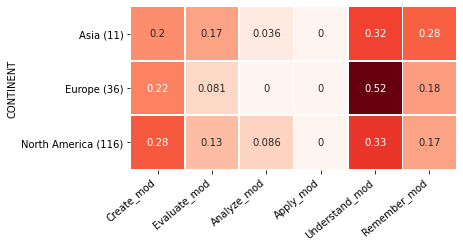

In [26]:
# Continent x mod
# normalizing the data
data = df2
data = data.div(data.sum(axis=1), axis=0)
# drawing the heatmap
plt.figure(figsize=(10, 3))
ax = sns.heatmap(data, cbar = False, square=True, annot=True, linewidths=.5, cmap="Reds")
xlabels = ['Create_mod', 'Evaluate_mod', 'Analyze_mod', 'Apply_mod', 'Understand_mod', 'Remember_mod']
ylabels = ['Asia (11)', 'Europe (36)', 'North America (116)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("continent_x_mod.pdf", bbox_inches='tight')

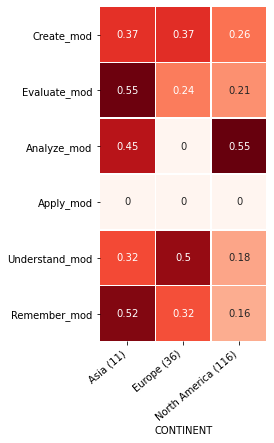

In [27]:
# Mod x continent
data = df2.transpose()
data = data.div(data.sum(axis=1), axis=0)
data = data.fillna(0)
# drawing the heatmap
plt.figure(figsize=(3, 10))
ax = sns.heatmap(data, cbar = False, square=True, annot=True, linewidths=.5, cmap="Reds")
ylabels = ['Asia (11)', 'Europe (36)', 'North America (116)']

ax.set_xticklabels(ylabels, rotation=40, ha='right')
ax.set_yticklabels(xlabels, rotation=0, ha='right')
plt.savefig("mod_x_continent.pdf", bbox_inches='tight')

# Bloom x Discipline

In [28]:
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS & LAW', ['DISCIPLINE']] = 'Multidisciplinary'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS & HUMN', ['DISCIPLINE']] = 'Multidisciplinary'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'LAW', ['DISCIPLINE']] = 'Law'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS', ['DISCIPLINE']] = 'Computer Science'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'HUMN', ['DISCIPLINE']] = 'Humanities'

In [29]:
df3 = merged_inner.groupby('DISCIPLINE').median()
df3.drop('Topic_1', axis = 1, inplace = True)
df3.drop('Topic_2', axis = 1, inplace = True)
df3.drop('Topic_3', axis = 1, inplace = True)
df3.drop('Topic_4', axis = 1, inplace = True)
df3.drop('Topic_5', axis = 1, inplace = True)
df3.drop('Topic_6', axis = 1, inplace = True)
df3.drop('Topic_7', axis = 1, inplace = True)
df3.drop('Topic_8', axis = 1, inplace = True)
df3.drop('Topic_9', axis = 1, inplace = True)
df3.drop('Topic_10', axis = 1, inplace = True)
df3.head(10)

,Bloom_1,Bloom_2,Bloom_3,Bloom_4,Bloom_5,Bloom_6
DISCIPLINE,,,,,,
Computer Science,0.00785,0.00285,0.00000,0.000,0.00820,0.00565
Humanities,0.00605,0.00260,0.00215,0.000,0.00800,0.00350
Law,0.00560,0.00560,0.00390,0.001,0.00610,0.00420
Multidisciplinary,0.00600,0.00225,0.00195,0.000,0.00865,0.00410


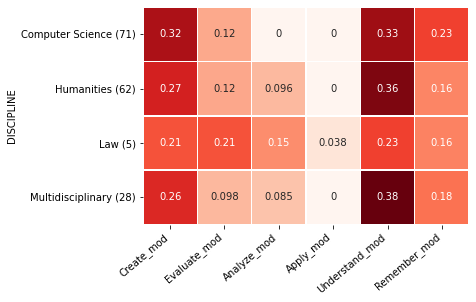

In [30]:
# Normalized
# normalizing the data
data = df3
data = data.div(data.sum(axis=1), axis=0)
# drawing the heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(data, cbar = False, square=True, annot=True, linewidths=.5, cmap="Reds")
ylabels = ['Computer Science (71)', 'Humanities (62)', 'Law (5)', 'Multidisciplinary (28)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("discipline_x_mod.pdf", bbox_inches='tight')

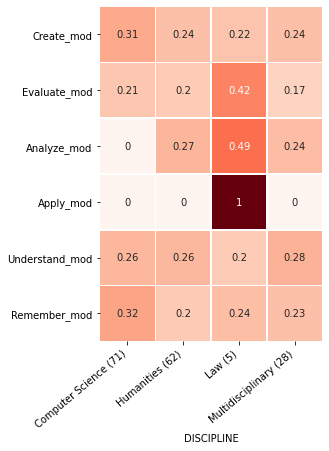

In [31]:
data = df3.transpose()
data = data.div(data.sum(axis=1), axis=0)
data = data.fillna(0)
# drawing the heatmap
plt.figure(figsize=(4, 10))
ax = sns.heatmap(data, cbar = False, square=True, annot=True, linewidths=.5, cmap="Reds")
ylabels = ['Computer Science (71)', 'Humanities (62)', 'Law (5)', 'Multidisciplinary (28)']

ax.set_xticklabels(ylabels, rotation=40, ha='right')
ax.set_yticklabels(xlabels, rotation=0, ha='right')
plt.savefig("mod_x_discipline.pdf", bbox_inches='tight')

# Modalities x Topics

In [32]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/home/osama.nasir@ebryx.com/Personal/Studies/AI_Ethics/lda/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word, random_seed=100)

# Show Topics
pprint(ldamallet.show_topics(formatted=False, num_words=15))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('medium', 0.05142478462557985),
   ('internet', 0.02491716368455931),
   ('digital', 0.024519549370444003),
   ('society', 0.023724320742213385),
   ('optional', 0.022266401590457258),
   ('culture', 0.016832339297548043),
   ('algorithm', 0.016699801192842943),
   ('public', 0.015109343936381709),
   ('community', 0.014976805831676607),
   ('practice', 0.012723658051689861),
   ('article', 0.012458581842279656),
   ('critical', 0.011928429423459244),
   ('platform', 0.011398277004638835),
   ('chapter', 0.011133200795228629),
   ('surveillance', 0.011000662690523525)]),
 (1,
  [('project', 0.07267119062307217),
   ('presentation', 0.04404688463911166),
   ('lecture', 0.04108574953732264),
   ('read', 0.02270203578038248),
   ('reflection', 0.019000616903146205),
   ('group', 0.018260333127698952),
   ('team', 0.016409623689080815),
   ('report', 0.013818630475015423),
   ('slide', 0.012461443553362123),
   ('section', 0.012214682294879703),
   ('software', 0.01209130166563849

In [33]:
# Show Topics
topics = ldamallet.show_topics(formatted=False, num_words=10)
#topics_s = sorted(topics, key=lambda x: x[1])
for topic in topics:
    keys = []
    for key in topic[1]:
        keys.append(key[0])
    print(keys)

['medium', 'internet', 'digital', 'society', 'optional', 'culture', 'algorithm', 'public', 'community', 'practice']
['project', 'presentation', 'lecture', 'read', 'reflection', 'group', 'team', 'report', 'slide', 'section']
['point', 'code', 'personal', 'review', 'identify', 'retrieve', 'base', 'concept', 'relate', 'professional']
['human', 'philosophy', 'ai', 'moral', 'future', 'machine', 'robot', 'chapter', 'philosophical', 'read']
['program', 'engineering', 'examination', 'offer', 'group', 'assessment', 'credit', 'module', 'apply', 'academic']
['people', 'decision', 'principle', 'build', 'responsibility', 'law', 'explain', 'user', 'framework', 'impact']
['word', 'find', 'day', 'writing', 'answer', 'case', 'text', 'short', 'argument', 'part']
['datum', 'link', 'data', 'law', 'legal', 'detail', 'analysis', 'bias', 'security', 'discrimination']
['ai', 'application', 'search', 'video', 'develop', 'story', 'apply', 'open', 'support', 'language']
['grade', 'material', 'post', 'date', 'par

In [34]:
#defining bloom levels
mod = list()
#create_mod
mod.append(['job', 'project', 'peer', 'teaching', 'workplace', 'profile'])
#evaluate_mod
mod.append(['job', 'review', 'peer', 'leadership'])
#analyze_mod
mod.append(['challenge', 'inquiry', 'investigate', 'investigation', 'survey'])
#apply_mod
mod.append(['roleplay', 'simulation', 'workshop', 'tutorial', 'scenario'])
#understand_mod
mod.append(['group', 'case_study', 'case_studie', 'interactive', 'discuss', 'assessment'])
#remember_mod
mod.append(['lecture', 'lecturer', 'seminar', 'test', 'testing'])

In [35]:
mod_bow = [id2word.doc2bow(text) for text in mod]

In [36]:
def modalities_percentage(ldamodel=ldamallet, corpus=mod_bow):
    # Init output
    sent_topics_df = pd.DataFrame()
    bloom_level = ['Remember_mod', 'Understand_mod', 'Apply_mod', 'Analyze_mod', 'Evaluate_mod', 'Create_mod']

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        #row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        topic_contr = list()
        topic_contr.append(bloom_level[i])
        for (topic_num, prop_topic) in row:
            #if j == 0:  # => dominant topic
            #wp = ldamodel.show_topic(topic_num)
            #topic_keywords = ", ".join([word for word, prop in wp])
            topic_contr.append(round(prop_topic,4))
        sent_topics_df = sent_topics_df.append(pd.Series(topic_contr), ignore_index=True)
    sent_topics_df.columns = ['Teaching modalities', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10']

    #Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_mod = modalities_percentage(ldamodel=ldamallet, corpus=mod_bow)

# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_mod

,Teaching modalities,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,Remember_mod,0.0893,0.1131,0.1111,0.1052,0.1032,0.0893,0.0893,0.0893,0.1111,0.0992
1,Understand_mod,0.0947,0.1049,0.1132,0.1049,0.0926,0.0926,0.0926,0.0926,0.1173,0.0947
2,Apply_mod,0.1293,0.1091,0.0909,0.0990,0.0909,0.0909,0.0909,0.1172,0.0909,0.0909
3,Analyze_mod,0.1029,0.1132,0.0967,0.0926,0.1008,0.1111,0.1029,0.0926,0.0947,0.0926
4,Evaluate_mod,0.0933,0.1012,0.0893,0.1270,0.1052,0.0893,0.1091,0.0893,0.1052,0.0913
5,Create_mod,0.0949,0.1313,0.1030,0.0929,0.1051,0.0909,0.0909,0.1091,0.0909,0.0909


In [37]:
df_mod.set_index('Teaching modalities', inplace=True)
df_mod = df_mod[::-1]

In [38]:
df_mod2 = df_mod.copy()
df_mod2.drop('Topic_2', axis = 1, inplace = True)
df_mod2.drop('Topic_3', axis = 1, inplace = True)
df_mod2.drop('Topic_5', axis = 1, inplace = True)
df_mod2.drop('Topic_7', axis = 1, inplace = True)
df_mod2.drop('Topic_10', axis = 1, inplace = True)
df_mod2.head()

,Topic_1,Topic_4,Topic_6,Topic_8,Topic_9
Teaching modalities,,,,,
Create_mod,0.0949,0.0929,0.0909,0.1091,0.0909
Evaluate_mod,0.0933,0.1270,0.0893,0.0893,0.1052
Analyze_mod,0.1029,0.0926,0.1111,0.0926,0.0947
Apply_mod,0.1293,0.0990,0.0909,0.1172,0.0909
Understand_mod,0.0947,0.1049,0.0926,0.0926,0.1173


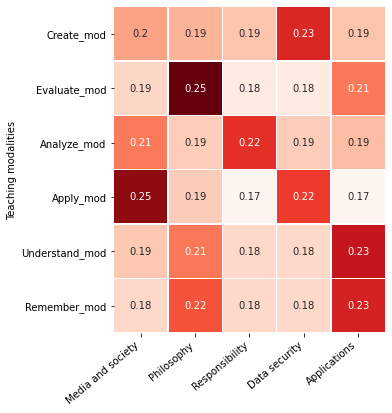

In [39]:
# Normalized
# normalizing the data
data = df_mod2
data = data.div(data.sum(axis=1), axis=0)
# drawing the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(data, cbar = False, square=True, annot=True, linewidths=.5, cmap="Reds")
ylabels = ['Media and society', 'Philosophy', 'Responsibility', 'Data security', 'Applications']

ax.set_xticklabels(ylabels, rotation=40, ha='right')
ax.set_yticklabels(xlabels, rotation=0, ha='right')
plt.savefig("mod_x_topic.pdf", bbox_inches='tight')

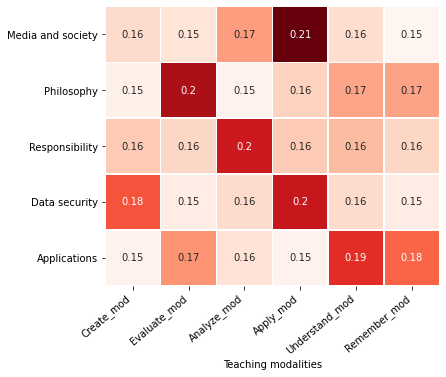

In [40]:
data = df_mod2.transpose()
data = data.div(data.sum(axis=1), axis=0)
# drawing the heatmap
plt.figure(figsize=(6, 8))
ax = sns.heatmap(data, cbar = False, square=True, annot=True, linewidths=.5, cmap="Reds")
ylabels = ['Media and society', 'Philosophy', 'Responsibility', 'Data security', 'Applications']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("topic_x_mod.pdf", bbox_inches='tight')

# Topic x Topic

In [3]:
import seaborn as sns
%matplotlib inline
df_lda = pd.read_excel('LDA_results.xlsx')
df_lda.head(5)

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,CS,Computer Science,Undergraduate,0.1017,0.1784,0.1142,0.1800,0.0548,0.1025,0.0383,0.1111,0.0563,0.0626
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,HUMN,MIT Media Lab,Graduate,0.1102,0.2390,0.0677,0.0246,0.0124,0.2553,0.0948,0.0355,0.0800,0.0803
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,CS,Computer Science,Undergraduate,0.1425,0.0773,0.0330,0.2917,0.0302,0.1150,0.0389,0.1127,0.1201,0.0385
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,CS,Computer Science and Communication Studies,"Undergraduate, Graduate",0.2005,0.0687,0.0687,0.0830,0.0217,0.1102,0.0656,0.2308,0.0882,0.0626
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,HUMN,School of Information,Undergraduate,0.1564,0.0391,0.1644,0.0519,0.0339,0.0887,0.0456,0.1225,0.0645,0.2331


In [4]:
topic_cols = [ 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10']
df_lda = df_lda[topic_cols]

In [5]:
df_lda['Dominant Topic'] = df_lda.idxmax(axis=1)
topicxtopic = df_lda.groupby('Dominant Topic').mean()
topicxtopic

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
Dominant Topic,,,,,,,,,,
Topic_1,0.239362,0.082119,0.097157,0.082414,0.072438,0.083390,0.076467,0.086071,0.087724,0.092867
Topic_10,0.074135,0.106462,0.112632,0.059785,0.082288,0.063350,0.113212,0.043532,0.051903,0.292685
Topic_2,0.072733,0.265957,0.086395,0.073967,0.082429,0.072152,0.096724,0.091681,0.064143,0.093805
Topic_3,0.093940,0.061840,0.356880,0.049980,0.042740,0.075960,0.091540,0.070540,0.081780,0.074800
Topic_4,0.077906,0.066624,0.062353,0.304224,0.067341,0.099435,0.079324,0.070465,0.101771,0.070524
Topic_5,0.053806,0.059022,0.060783,0.062550,0.397733,0.063639,0.064022,0.063989,0.110167,0.064289
Topic_6,0.087112,0.064937,0.087212,0.085050,0.057363,0.343925,0.072325,0.066275,0.090350,0.045450
Topic_7,0.078133,0.097292,0.079042,0.091900,0.062000,0.052017,0.313558,0.042283,0.067408,0.116358
Topic_8,0.079806,0.097041,0.086665,0.074288,0.063224,0.082959,0.076588,0.276347,0.065929,0.097112


In [6]:
row = topicxtopic.iloc[1]
topicxtopic.drop('Topic_10', axis=0, inplace=True)
topicxtopic.loc['Topic_10'] = row
topicxtopic = round(topicxtopic, 4)
topicxtopic = topicxtopic*100

In [7]:
topicxtopic['sort'] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i,t in enumerate(topic_cols):
    topicxtopic['sort'][i] = topicxtopic[t][t]
    topicxtopic[t][t] = 0
topicxtopic.sort_values(by=['sort'], ascending=False, inplace=True)
topicxtopic.drop('sort', axis=1, inplace=True)
topicxtopic

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
Dominant Topic,,,,,,,,,,
Topic_5,5.38,5.90,6.08,6.25,0.00,6.36,6.40,6.40,11.02,6.43
Topic_3,9.39,6.18,0.00,5.00,4.27,7.60,9.15,7.05,8.18,7.48
Topic_6,8.71,6.49,8.72,8.51,5.74,0.00,7.23,6.63,9.03,4.55
Topic_7,7.81,9.73,7.90,9.19,6.20,5.20,0.00,4.23,6.74,11.64
Topic_4,7.79,6.66,6.24,0.00,6.73,9.94,7.93,7.05,10.18,7.05
Topic_9,10.50,6.72,7.36,6.24,11.13,6.14,8.50,7.31,0.00,6.06
Topic_10,7.41,10.65,11.26,5.98,8.23,6.33,11.32,4.35,5.19,0.00
Topic_8,7.98,9.70,8.67,7.43,6.32,8.30,7.66,0.00,6.59,9.71
Topic_2,7.27,0.00,8.64,7.40,8.24,7.22,9.67,9.17,6.41,9.38


In [8]:
topicxtopic.loc['sum'] = topicxtopic.sum(axis=0)
topicxtopic.sort_values(by=['sum'], axis=1, ascending=False, inplace=True)
topicxtopic.drop('sum', axis=0, inplace=True)
topicxtopic

,Topic_7,Topic_3,Topic_1,Topic_9,Topic_10,Topic_2,Topic_6,Topic_4,Topic_5,Topic_8
Dominant Topic,,,,,,,,,,
Topic_5,6.40,6.08,5.38,11.02,6.43,5.90,6.36,6.25,0.00,6.40
Topic_3,9.15,0.00,9.39,8.18,7.48,6.18,7.60,5.00,4.27,7.05
Topic_6,7.23,8.72,8.71,9.03,4.55,6.49,0.00,8.51,5.74,6.63
Topic_7,0.00,7.90,7.81,6.74,11.64,9.73,5.20,9.19,6.20,4.23
Topic_4,7.93,6.24,7.79,10.18,7.05,6.66,9.94,0.00,6.73,7.05
Topic_9,8.50,7.36,10.50,0.00,6.06,6.72,6.14,6.24,11.13,7.31
Topic_10,11.32,11.26,7.41,5.19,0.00,10.65,6.33,5.98,8.23,4.35
Topic_8,7.66,8.67,7.98,6.59,9.71,9.70,8.30,7.43,6.32,0.00
Topic_2,9.67,8.64,7.27,6.41,9.38,0.00,7.22,7.40,8.24,9.17


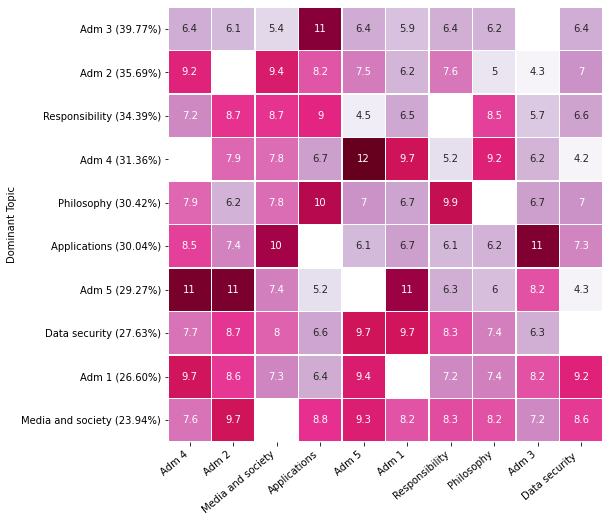

In [18]:
data = topicxtopic
data[data == 0] = np.nan
#data = data.div(data.sum(axis=1), axis=0)*100
# drawing the heatmap
plt.figure(figsize=(8, 8))
ax = sns.heatmap(data, cbar = False, square=True, annot=True, linewidths=.5, cmap="PuRd")
xlabels = ['Adm 4', 'Adm 2', 'Media and society', 'Applications', 'Adm 5', 'Adm 1', 'Responsibility', 'Philosophy', 'Adm 3', 'Data security ']
ylabels = ['Adm 3 (39.77%)', 'Adm 2 (35.69%)', 'Responsibility (34.39%)', 'Adm 4 (31.36%)', 'Philosophy (30.42%)', 'Applications (30.04%)', 'Adm 5 (29.27%)', 'Data security (27.63%)', 'Adm 1 (26.60%)', 'Media and society (23.94%)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
#ax.set_ylabel('')
plt.savefig("topic_x_topic_all_purple.pdf", bbox_inches='tight')

In [19]:
data.sum(axis=1)

Dominant Topic
Topic_5     60.22
Topic_3     64.30
Topic_6     65.61
Topic_7     68.64
Topic_4     69.57
Topic_9     69.96
Topic_10    70.72
Topic_8     72.36
Topic_2     73.40
Topic_1     76.07
dtype: float64

# Topic x Topic (without admin topics)

In [20]:
import seaborn as sns
%matplotlib inline
df_lda = pd.read_excel('LDA_results.xlsx')
df_lda.head(5)

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,CS,Computer Science,Undergraduate,0.1017,0.1784,0.1142,0.1800,0.0548,0.1025,0.0383,0.1111,0.0563,0.0626
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,HUMN,MIT Media Lab,Graduate,0.1102,0.2390,0.0677,0.0246,0.0124,0.2553,0.0948,0.0355,0.0800,0.0803
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,CS,Computer Science,Undergraduate,0.1425,0.0773,0.0330,0.2917,0.0302,0.1150,0.0389,0.1127,0.1201,0.0385
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,CS,Computer Science and Communication Studies,"Undergraduate, Graduate",0.2005,0.0687,0.0687,0.0830,0.0217,0.1102,0.0656,0.2308,0.0882,0.0626
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,HUMN,School of Information,Undergraduate,0.1564,0.0391,0.1644,0.0519,0.0339,0.0887,0.0456,0.1225,0.0645,0.2331


In [21]:
topic_cols = [ 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10']
df_lda = df_lda[topic_cols]

In [22]:
df_lda['Dominant Topic'] = df_lda.idxmax(axis=1)
topicxtopic = df_lda.groupby('Dominant Topic').mean()
topicxtopic

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
Dominant Topic,,,,,,,,,,
Topic_1,0.239362,0.082119,0.097157,0.082414,0.072438,0.083390,0.076467,0.086071,0.087724,0.092867
Topic_10,0.074135,0.106462,0.112632,0.059785,0.082288,0.063350,0.113212,0.043532,0.051903,0.292685
Topic_2,0.072733,0.265957,0.086395,0.073967,0.082429,0.072152,0.096724,0.091681,0.064143,0.093805
Topic_3,0.093940,0.061840,0.356880,0.049980,0.042740,0.075960,0.091540,0.070540,0.081780,0.074800
Topic_4,0.077906,0.066624,0.062353,0.304224,0.067341,0.099435,0.079324,0.070465,0.101771,0.070524
Topic_5,0.053806,0.059022,0.060783,0.062550,0.397733,0.063639,0.064022,0.063989,0.110167,0.064289
Topic_6,0.087112,0.064937,0.087212,0.085050,0.057363,0.343925,0.072325,0.066275,0.090350,0.045450
Topic_7,0.078133,0.097292,0.079042,0.091900,0.062000,0.052017,0.313558,0.042283,0.067408,0.116358
Topic_8,0.079806,0.097041,0.086665,0.074288,0.063224,0.082959,0.076588,0.276347,0.065929,0.097112


In [23]:
row = topicxtopic.iloc[1]
topicxtopic.drop('Topic_10', axis=0, inplace=True)
topicxtopic.loc['Topic_10'] = row
topicxtopic = round(topicxtopic, 4)
topicxtopic = topicxtopic*100
topicxtopic

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
Dominant Topic,,,,,,,,,,
Topic_1,23.94,8.21,9.72,8.24,7.24,8.34,7.65,8.61,8.77,9.29
Topic_2,7.27,26.60,8.64,7.40,8.24,7.22,9.67,9.17,6.41,9.38
Topic_3,9.39,6.18,35.69,5.00,4.27,7.60,9.15,7.05,8.18,7.48
Topic_4,7.79,6.66,6.24,30.42,6.73,9.94,7.93,7.05,10.18,7.05
Topic_5,5.38,5.90,6.08,6.25,39.77,6.36,6.40,6.40,11.02,6.43
Topic_6,8.71,6.49,8.72,8.51,5.74,34.39,7.23,6.63,9.03,4.55
Topic_7,7.81,9.73,7.90,9.19,6.20,5.20,31.36,4.23,6.74,11.64
Topic_8,7.98,9.70,8.67,7.43,6.32,8.30,7.66,27.63,6.59,9.71
Topic_9,10.50,6.72,7.36,6.24,11.13,6.14,8.50,7.31,30.04,6.06


In [24]:
topicxtopic.drop('Topic_2', axis = 1, inplace = True)
topicxtopic.drop('Topic_3', axis = 1, inplace = True)
topicxtopic.drop('Topic_5', axis = 1, inplace = True)
topicxtopic.drop('Topic_7', axis = 1, inplace = True)
topicxtopic.drop('Topic_10', axis = 1, inplace = True)
topicxtopic.drop('Topic_2', axis = 0, inplace = True)
topicxtopic.drop('Topic_3', axis = 0, inplace = True)
topicxtopic.drop('Topic_5', axis = 0, inplace = True)
topicxtopic.drop('Topic_7', axis = 0, inplace = True)
topicxtopic.drop('Topic_10', axis = 0, inplace = True)
topicxtopic

,Topic_1,Topic_4,Topic_6,Topic_8,Topic_9
Dominant Topic,,,,,
Topic_1,23.94,8.24,8.34,8.61,8.77
Topic_4,7.79,30.42,9.94,7.05,10.18
Topic_6,8.71,8.51,34.39,6.63,9.03
Topic_8,7.98,7.43,8.30,27.63,6.59
Topic_9,10.50,6.24,6.14,7.31,30.04


In [25]:
topic_cols = ['Topic_1', 'Topic_4', 'Topic_6', 'Topic_8', 'Topic_9']
topicxtopic['sort'] = [0.0, 0.0, 0.0, 0.0, 0.0]
for i,t in enumerate(topic_cols):
    topicxtopic['sort'][i] = topicxtopic[t][t]
    topicxtopic[t][t] = 0
topicxtopic.sort_values(by=['sort'], ascending=False, inplace=True)
topicxtopic.drop('sort', axis=1, inplace=True)
topicxtopic

,Topic_1,Topic_4,Topic_6,Topic_8,Topic_9
Dominant Topic,,,,,
Topic_6,8.71,8.51,0.00,6.63,9.03
Topic_4,7.79,0.00,9.94,7.05,10.18
Topic_9,10.50,6.24,6.14,7.31,0.00
Topic_8,7.98,7.43,8.30,0.00,6.59
Topic_1,0.00,8.24,8.34,8.61,8.77


In [26]:
topicxtopic.loc['sum'] = topicxtopic.sum(axis=0)
topicxtopic.sort_values(by=['sum'], axis=1, ascending=False, inplace=True)
topicxtopic.drop('sum', axis=0, inplace=True)
topicxtopic

,Topic_1,Topic_9,Topic_6,Topic_4,Topic_8
Dominant Topic,,,,,
Topic_6,8.71,9.03,0.00,8.51,6.63
Topic_4,7.79,10.18,9.94,0.00,7.05
Topic_9,10.50,0.00,6.14,6.24,7.31
Topic_8,7.98,6.59,8.30,7.43,0.00
Topic_1,0.00,8.77,8.34,8.24,8.61


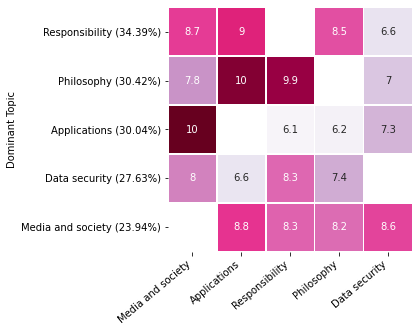

In [30]:
data = topicxtopic
data[data == 0] = np.nan
#data = data.div(data.sum(axis=1), axis=0)*100
# drawing the heatmap
plt.figure(figsize=(4.5, 4.5))
ax = sns.heatmap(data, cbar = False, square=True, annot=True, linewidths=.5, cmap="PuRd")
xlabels = ['Media and society', 'Applications', 'Responsibility', 'Philosophy', 'Data security']
ylabels = ['Responsibility (34.39%)', 'Philosophy (30.42%)', 'Applications (30.04%)', 'Data security (27.63%)', 'Media and society (23.94%)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
#ax.set_ylabel('')
plt.savefig("topic_x_topic_non_admin_purple.pdf", bbox_inches='tight')